In [94]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

In [2]:
set_seed(1)

In [3]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#split the training set into a new training set and a validation set
n_val = int(len(x_train)*0.1)

x_val = x_train[:n_val]
y_val = y_train[:n_val]

x_train_nv = x_train[n_val:]
y_train_nv = y_train[n_val:]

In [13]:
def my_model_mbgd(shape, n, classes, learning_rate, x_train, y_train, epochs, batch_size, x_val, y_val):
    """
    Initializes, compiles, and fits a model.
    
    Parameters:
    - shape: tuple, the shape of the input images ((28,28) for minst)
    - n: int, the number of nodes in the hidden layer
    - classes: int, the number of classes (10 for minst)
    - learning_rate: float, the learning rate
    - x_train: numpy.ndarray
    - y_train: numpy.ndarray
    - epochs: int
    - batch_size: int
    - x_val: numpy.ndarray
    - y_val: numpy.ndarray
      
    Returns:
    - The fitted model and the history object.
    """
    
    # initialize model
    model = Sequential([
        Input(shape=shape),
        Flatten(),
        Dense(n, activation="tanh", name="hidden"), # new layer
        Dense(classes)
    ])

    # compile model
    model.compile(optimizer=SGD(learning_rate=learning_rate),
                  loss=SparseCategoricalCrossentropy(from_logits=True), # from_logits=True applies softmax to loss
                  metrics=["accuracy"]
                 )

    # fit model
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))
    
    return model, history

In [14]:

model, history = my_model_mbgd(shape=(28,28),n=300,classes=10,learning_rate=0.01,x_train=x_train_nv,y_train =y_train_nv,epochs=50,batch_size=50,x_val=x_val,y_val=y_val)

Epoch 1/50
1080/1080 [==============================] - 7s 6ms/step - loss: 0.5753 - accuracy: 0.8334 - val_loss: 0.3705 - val_accuracy: 0.9008
Epoch 2/50
1080/1080 [==============================] - 6s 6ms/step - loss: 0.3566 - accuracy: 0.8986 - val_loss: 0.3090 - val_accuracy: 0.9138
Epoch 3/50
1080/1080 [==============================] - 6s 6ms/step - loss: 0.3197 - accuracy: 0.9083 - val_loss: 0.2918 - val_accuracy: 0.9197
Epoch 4/50
1080/1080 [==============================] - 6s 6ms/step - loss: 0.3035 - accuracy: 0.9128 - val_loss: 0.2755 - val_accuracy: 0.9210
Epoch 5/50
1080/1080 [==============================] - 5s 5ms/step - loss: 0.2851 - accuracy: 0.9166 - val_loss: 0.2661 - val_accuracy: 0.9258
Epoch 6/50
1080/1080 [==============================] - 6s 6ms/step - loss: 0.2819 - accuracy: 0.9185 - val_loss: 0.2750 - val_accuracy: 0.9225
Epoch 7/50
1080/1080 [==============================] - 6s 5ms/step - loss: 0.2702 - accuracy: 0.9222 - val_loss: 0.2472 - val_accuracy:

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1772 - accuracy: 0.9461


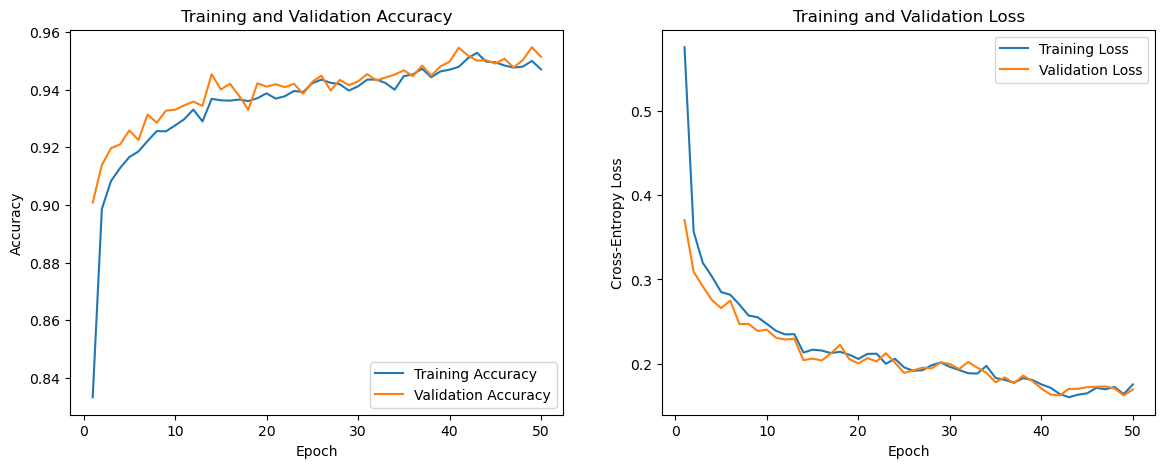

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

# Plot training and validation accuracy per epoch
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss per epoch
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [17]:
predictions = model.predict(x_test)
pred_class = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 4ms/step


In [18]:
pred_correct = np.where(pred_class == y_test)[0]
pred_incorrect = np.where(pred_class != y_test)[0]

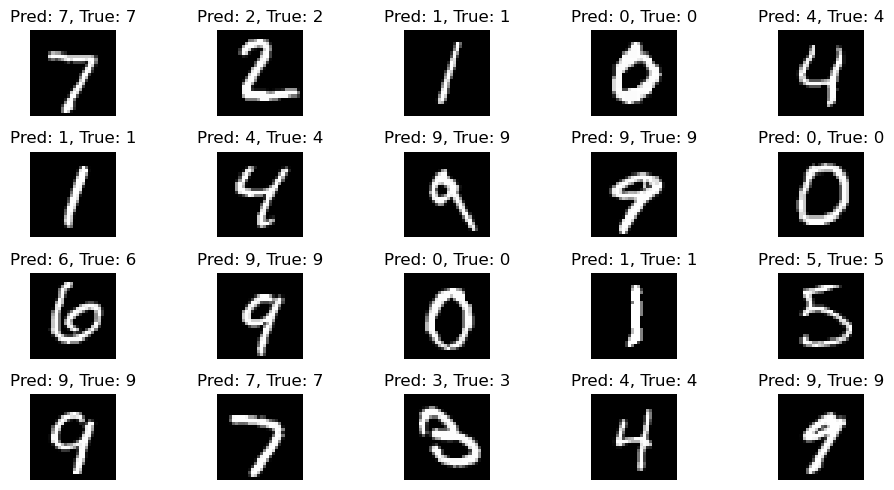

In [19]:
plt.figure(figsize=(10, 5))
for i, correct in enumerate(pred_correct[:20]):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[correct].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred_class[correct]}, True: {y_test[correct]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

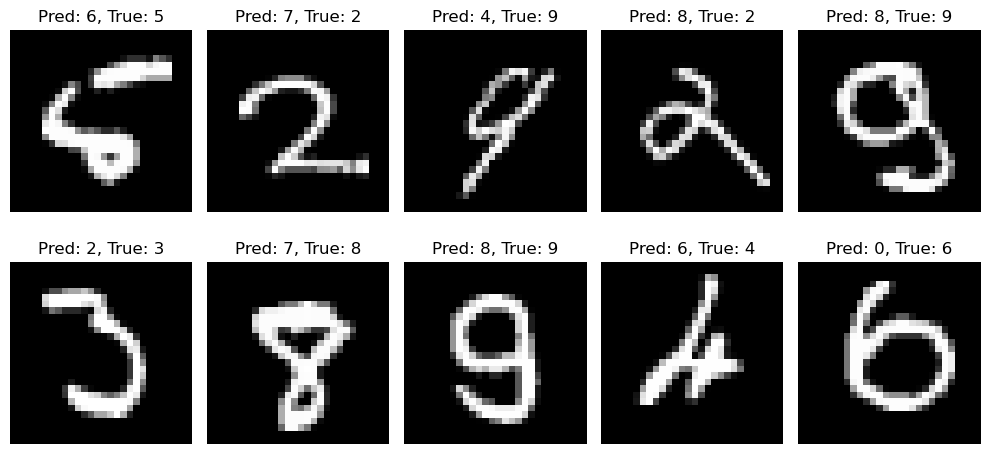

In [20]:
plt.figure(figsize=(10, 5))
for i, incorrect in enumerate(pred_incorrect[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[incorrect].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred_class[incorrect]}, True: {y_test[incorrect]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [96]:
weights = model.layers[1].weights[0]

In [138]:
#size = 300
#plt.figure(figsize=(10, 100))
#for i in range(size):
#    plt.subplot(int(size/5), 5, i + 1)
#    plt.imshow(np.reshape(weights[:, i], (28, 28)), cmap='coolwarm')
#    plt.title(i)
#    plt.axis('off')
#plt.tight_layout()
#plt.show()

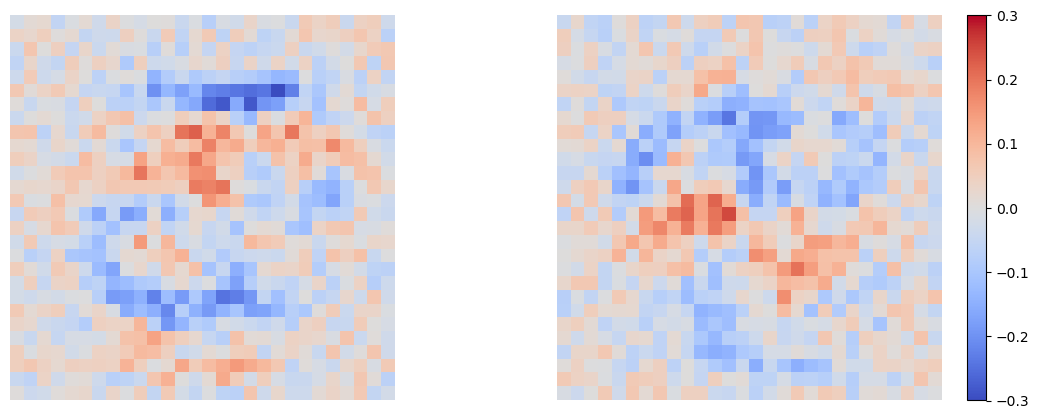

In [137]:
plt.figure(figsize=(14, 5))
interesting_w = [7, 63]

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(weights[:, interesting_w[0]], (28, 28)), cmap='coolwarm', vmin = -0.3, vmax = 0.3)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.reshape(weights[:, interesting_w[1]], (28, 28)), cmap='coolwarm', vmin = -0.3, vmax = 0.3)
plt.axis('off')
plt.colorbar()

plt.show()

In [140]:
model.layers[1].weights

[<tf.Variable 'hidden/kernel:0' shape=(784, 300) dtype=float32, numpy=
 array([[ 0.01653463, -0.06618281,  0.0214246 , ...,  0.07118876,
          0.03817493,  0.05940077],
        [ 0.01282381, -0.01130474,  0.0200243 , ...,  0.04236488,
          0.06747222, -0.06946661],
        [ 0.03818075, -0.06791116, -0.03877367, ..., -0.00584427,
          0.06806415,  0.02935989],
        ...,
        [-0.00962053,  0.05371073, -0.04531805, ...,  0.03398804,
         -0.03894624, -0.01636335],
        [-0.0009657 , -0.03837326,  0.04047626, ...,  0.05818368,
          0.04472475,  0.00771944],
        [ 0.05937359, -0.07115228,  0.03972783, ...,  0.06242506,
          0.06315389,  0.02549809]], dtype=float32)>,
 <tf.Variable 'hidden/bias:0' shape=(300,) dtype=float32, numpy=
 array([-2.61899724e-04, -3.38076090e-04, -8.83912871e-05, -3.53640382e-04,
         4.19262738e-04, -5.04826370e-04, -2.02598429e-04,  5.81233529e-04,
        -5.53088961e-04, -6.51964452e-04, -1.98158057e-04, -3.6138165